<a href="https://colab.research.google.com/github/Ishansingh438/Forage-Internship/blob/main/Quantium.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

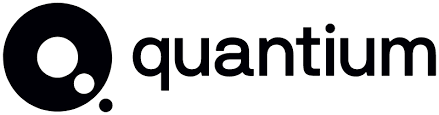

# **Virtual Internship Program**:
#        Data Analytics

# Data preparation and customer analytics.

### *Conduct analysis on your client's transaction dataset and identify customer purchasing behaviours to generate insights and provide commercial recommendations.*

# Background information on your task:

You are part of Quantium’s retail analytics team and have been approached by your client, the Category Manager for Chips, who wants to better understand the types of customers who purchase Chips and their purchasing behaviour within the region.
The insights from your analysis will feed into the supermarket’s strategic plan for the chip category in the next half year.

You have received the following email from your manager, Zilinka.

'Hi, 

Welcome again to the team, we love having new graduates join us! 

I just wanted to send a quick follow up from our conversation earlier with a few pointers around the key areas of this task to make sure we set you up for success. 

Below I have outlined your main tasks along with what we should be looking for in the data for each. 

Examine transaction data – look for inconsistencies, missing data across the data set, outliers, correctly identified category items, numeric data across all tables. If you determine any anomalies make the necessary changes in the dataset and save it. Having clean data will help when it comes to your analysis. 

Examine customer data – check for similar issues in the customer data, look for nulls and when you are happy merge the transaction and customer data together so it’s ready for the analysis ensuring you save your files along the way.

Data analysis and customer segments – in your analysis make sure you define the metrics – look at total sales, drivers of sales, where the highest sales are coming from etc. Explore the data, create charts and graphs as well as noting any interesting trends and/or insights you find. These will all form part of our report to Julia. 

Deep dive into customer segments – define your recommendation from your insights, determine which segments we should be targeting, if packet sizes are relative and form an overall conclusion based on your analysis. 

Make sure you save your analysis in the CSV files and your visualisations – we will need them for our report. If you could work on this analysis and send me your initial findings by end of next week that would be great.  

Looking forward to reviewing your work. 

Thanks, 

Zilinka'



# Here is your task

We need to present a strategic recommendation to Julia that is supported by data which she can then use for the upcoming category review however to do so we need to analyse the data to understand the current purchasing trends and behaviours. The client is particularly interested in customer segments and their chip purchasing behaviour. Consider what metrics would help describe the customers’ purchasing behaviour.  



We have chosen to complete this task in R, however you will also find Python to be a useful tool in this piece of analytics. If you aren’t familiar with R or Python we would recommend searching a few online courses to help get you started. We have also provided an R solution template if you want some assistance in getting through this Task. Whilst its possible to complete the task in Excel you may find the size of the data and the nature of the tasks is such that it is more difficult to complete in Excel.  



To get started, download the resource csv data files below and begin performing high level data checks such as:



• Creating and interpreting high level summaries of the data

• Finding outliers and removing these (if applicable)

• Checking data formats and correcting (if applicable)

You will also want to derive extra features such as pack size and brand name from the data and define metrics of interest to enable you to draw insights on who spends on chips and what drives spends for each customer segment. Remember our end goal is to form a strategy based on the findings to provide a clear recommendation to Julia the Category Manager so make sure your insights can have a commercial application.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/QVI_purchase_behaviour1.csv',low_memory=False)
# first view of dataset
df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,17/10/2018,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,14/05/2019,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,YOUNG SINGLES/COUPLES,Mainstream
2,20/05/2019,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,YOUNG FAMILIES,Budget
3,17/08/2018,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,OLDER SINGLES/COUPLES,Mainstream
4,18/08/2018,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...,...,...,...,...,...,...,...
264831,09/03/2019,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,NaN,NaN
264832,13/08/2018,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,NaN,NaN
264833,06/11/2018,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,NaN,NaN
264834,27/12/2018,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,NaN,NaN


In [ ]:
df.shape

(264836, 10)

In [ ]:
df.columns

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES', 'LIFESTAGE', 'PREMIUM_CUSTOMER'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   DATE              264836 non-null  object 
 1   STORE_NBR         264836 non-null  int64  
 2   LYLTY_CARD_NBR    264836 non-null  int64  
 3   TXN_ID            264836 non-null  int64  
 4   PROD_NBR          264836 non-null  int64  
 5   PROD_NAME         264836 non-null  object 
 6   PROD_QTY          264836 non-null  int64  
 7   TOT_SALES         264836 non-null  float64
 8   LIFESTAGE         72637 non-null   object 
 9   PREMIUM_CUSTOMER  72637 non-null   object 
dtypes: float64(1), int64(5), object(4)
memory usage: 20.2+ MB


In [ ]:
# check for unique values
df.nunique()

DATE                   364
STORE_NBR              272
LYLTY_CARD_NBR       72637
TXN_ID              263127
PROD_NBR               114
PROD_NAME              114
PROD_QTY                 6
TOT_SALES              112
LIFESTAGE                7
PREMIUM_CUSTOMER         3
dtype: int64

In [ ]:
# Check for null values
df.isnull().sum()

DATE                     0
STORE_NBR                0
LYLTY_CARD_NBR           0
TXN_ID                   0
PROD_NBR                 0
PROD_NAME                0
PROD_QTY                 0
TOT_SALES                0
LIFESTAGE           192199
PREMIUM_CUSTOMER    192199
dtype: int64

In [ ]:
df.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


# Show trends and pattern

<ipython-input-33-2761ecd1e0ba>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(bins=20, ax=ax)


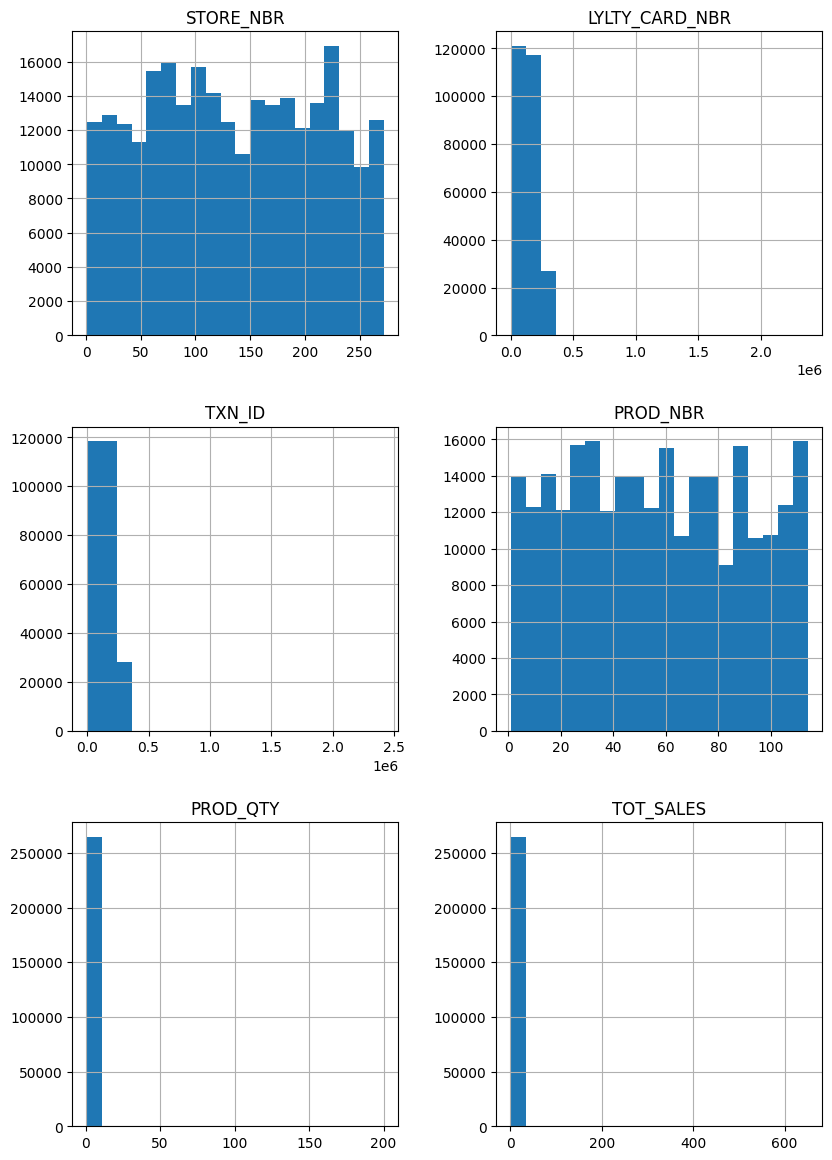

In [33]:
# Plot a histogram 

fig, ax = plt.subplots(figsize=(10, 15))
df.hist(bins=20, ax=ax)
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Data')

# Adjust spacing between the plot and labels
plt.subplots_adjust(left=0.15, bottom=0.15)

plt.show()

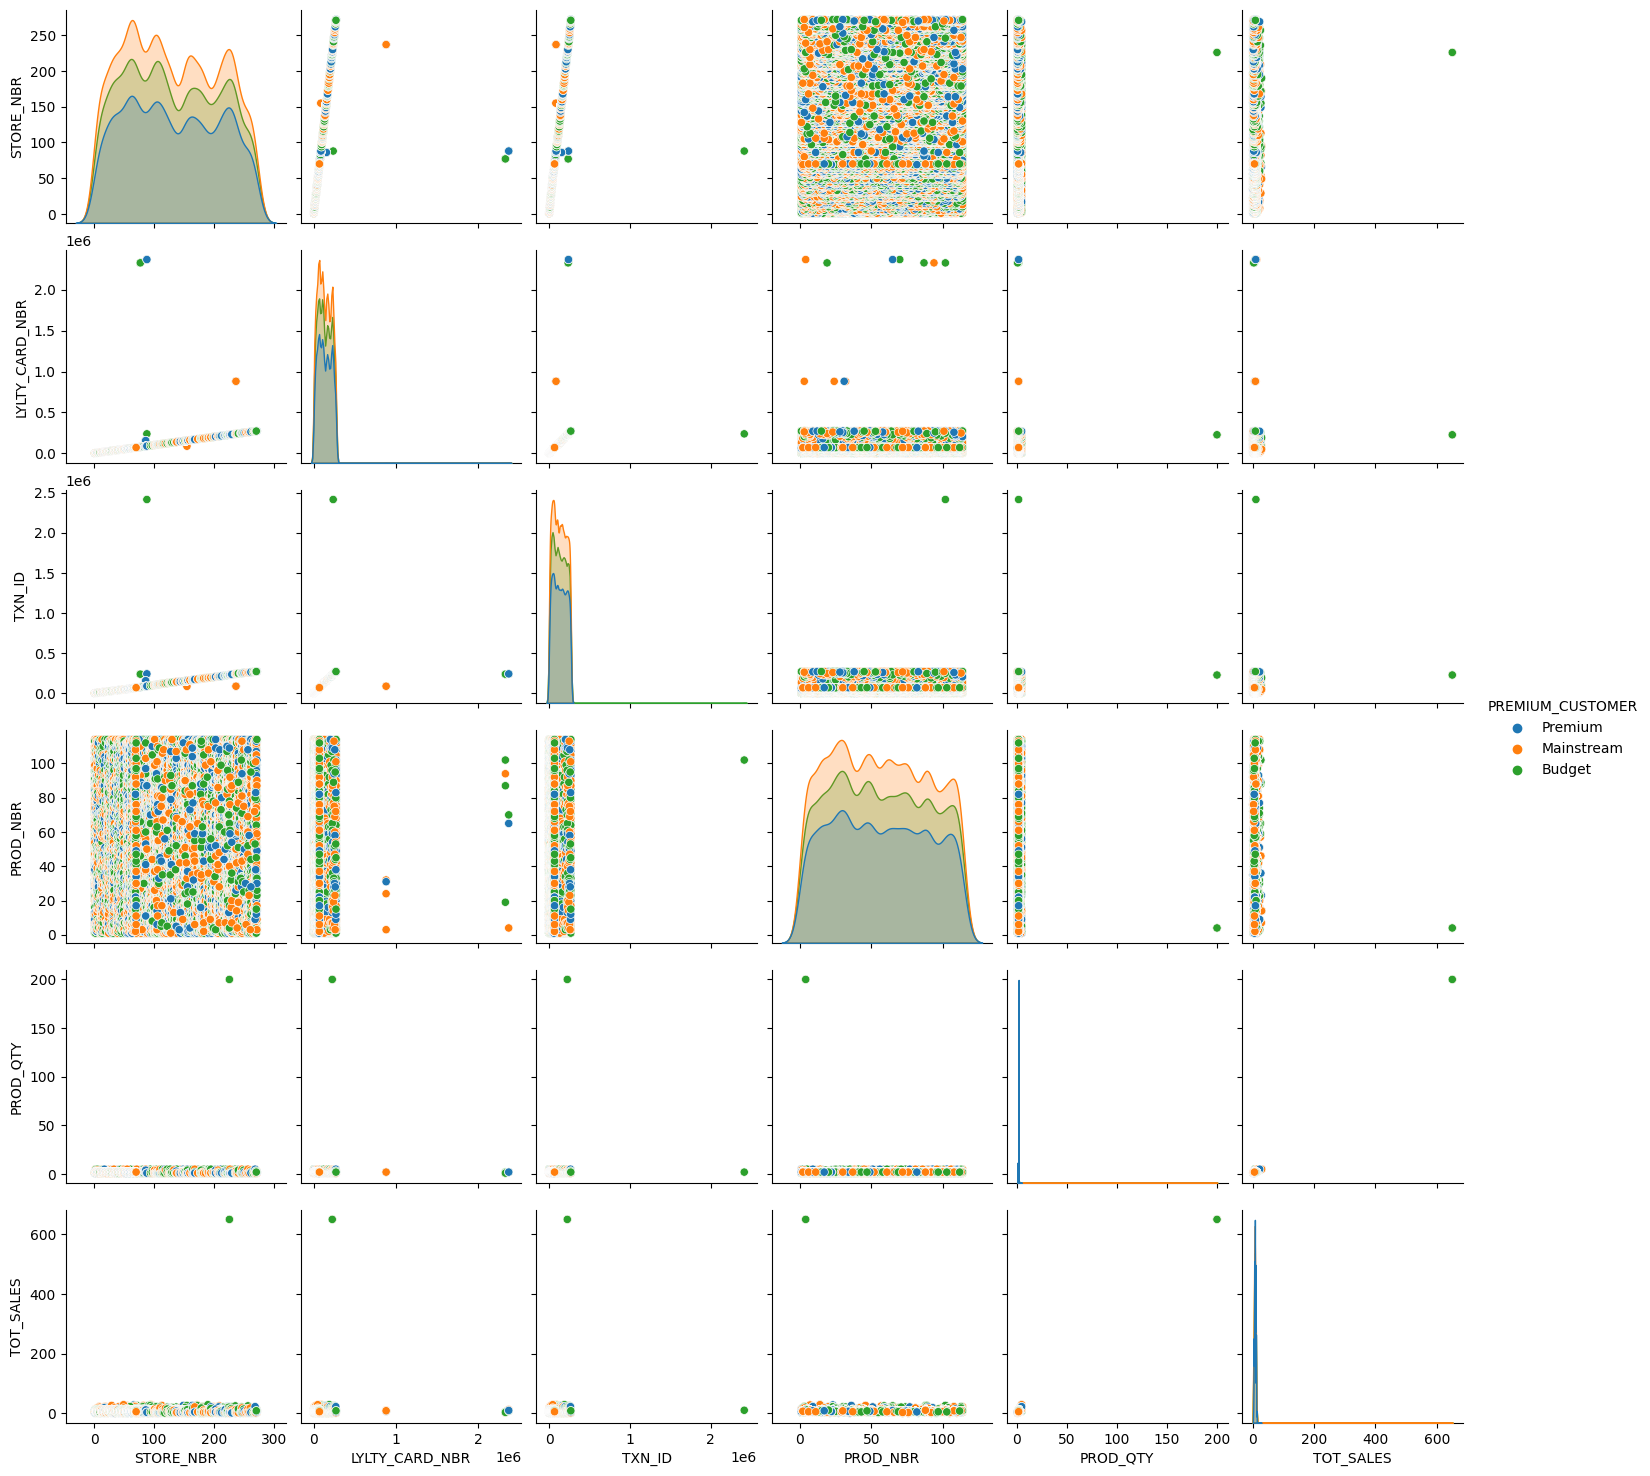

In [ ]:
# pairplot of the variables
sns.pairplot(df,hue='PREMIUM_CUSTOMER')

<Axes: >

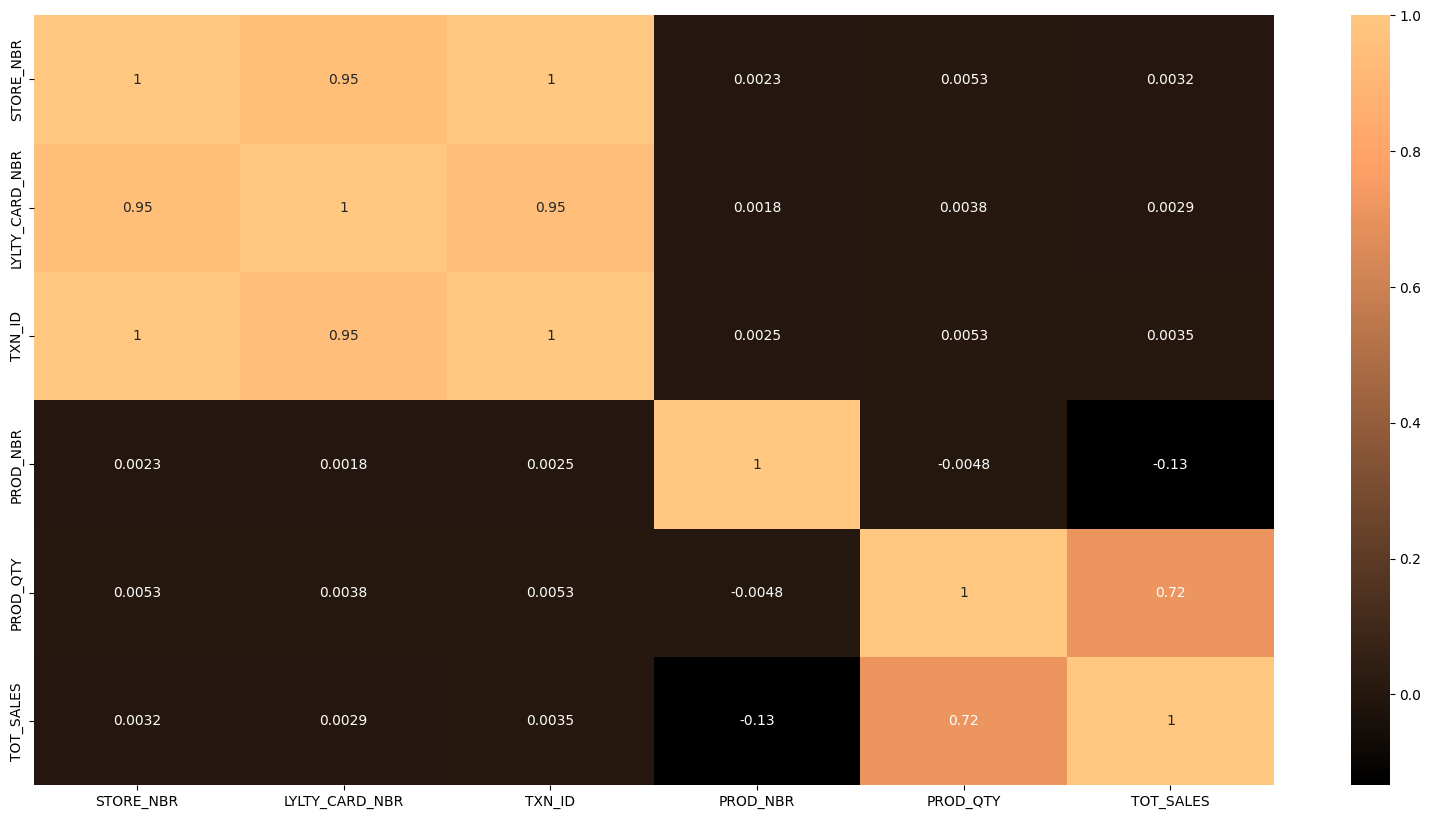

In [ ]:
# Check for multi-collinearity
correlation = df.corr()
plt.figure(figsize = [20,10])
sns.heatmap(correlation, cmap = 'copper', annot = True)

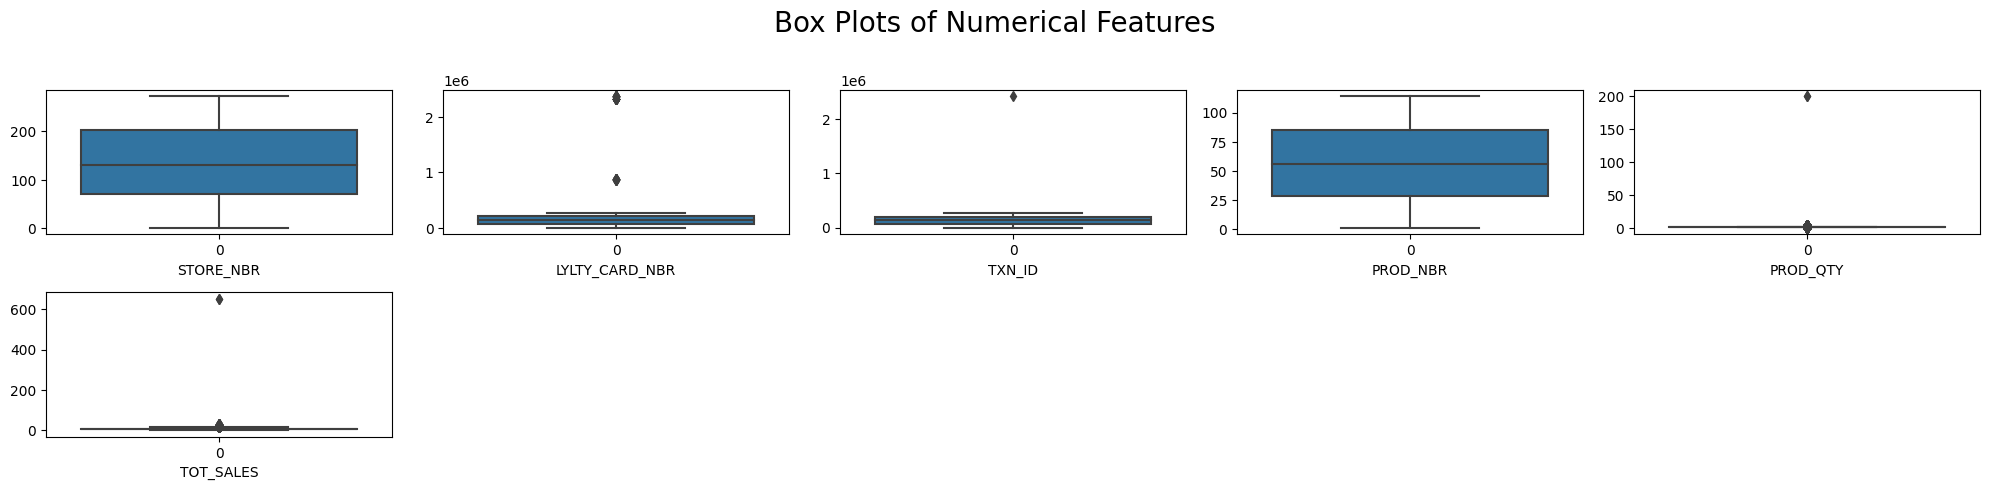

In [ ]:
# Checking for outliers
plt.figure(figsize=(20, 10))
x = 1

for column in df.columns:
    if column != 'DATE' and df[column].dtype != 'object':
        plt.subplot(5, 5, x)
        sns.boxplot(df[column])
        plt.xlabel(column)
        x += 1

plt.tight_layout()
plt.suptitle('Box Plots of Numerical Features', fontsize=20, y=1.05)
plt.show()